In [8]:
import numpy as np

class KNNClassifier:
    def __init__(self, n_neighbors='auto', p=2):
        self.n_neighbors = n_neighbors
        self.p = p
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.n_neighbors == 'auto':
            self.n_neighbors = int(np.sqrt(len(self.X)))
            if self.n_neighbors % 2 != 0:
                self.n_neighbors += 1
        return self
    
    def predict(self, X):
        predictions = []
        self.confidence = []
        for pred_row in X:
            euclidean_distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                euclidean_distances.append(distance)
            neighbors = self.y[np.argsort(euclidean_distances)[:self.n_neighbors]]
            neighbors_bc = np.bincount(neighbors)
            prediction = np.argmax(neighbors_bc)
            self.confidence.append(neighbors_bc[prediction]/len(neighbors))
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [10]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [12]:
y_pred=knn.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  0  0]
 [ 0 10  0]
 [ 0  3 10]]


0.9

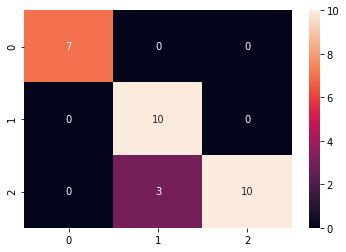

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
